In [42]:
#RAG from scratch:

corpus_of_documents=[
        "Take a leisurely walk in the park and enjoy the fresh air.",
    "Visit a local museum and discover something new.",
    "Attend a live music concert and feel the rhythm.",
    "Go for a hike and admire the natural scenery.",
    "Have a picnic with friends and share some laughs.",
    "Explore a new cuisine by dining at an ethnic restaurant.",
    "Take a yoga class and stretch your body and mind.",
    "Join a local sports league and enjoy some friendly competition.",
    "Attend a workshop or lecture on a topic you're interested in.",
    "Visit an amusement park and ride the roller coasters."
]

In [43]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

In [ ]:
#For similarity search, we use --> cosine similarity

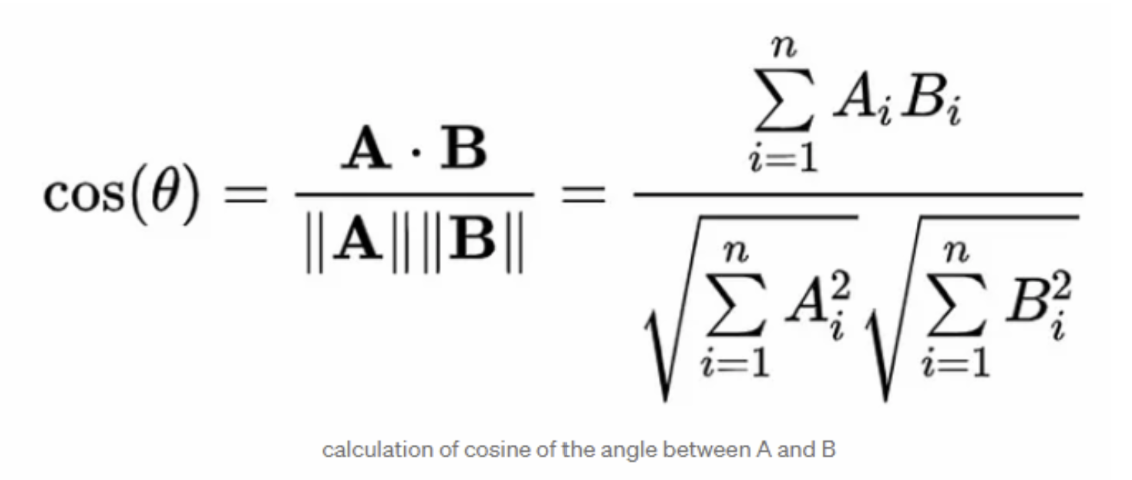

In [45]:
user_query="I am a Nepali and I live in Nepal."

In [59]:
document="Nepal is a country for the Nepali and for everyone else."

In [47]:
from collections import Counter
import math

#We're gonna convert all the words/tokens into lowercase and split them individually. 

In [53]:
query_tokens=user_query.lower().split(" ")
query_tokens

['i', 'am', 'a', 'nepali', 'and', 'i', 'live', 'in', 'nepal.']

In [60]:
document_tokens=document.lower().split(" ")
document_tokens

['nepal',
 'is',
 'a',
 'country',
 'for',
 'the',
 'nepali',
 'and',
 'for',
 'everyone',
 'else.']

#Since we need numerical representations, we're gonna convert the tokens:

In [57]:
query_counter= Counter(query_tokens) 
query_counter     #we get the frequency of each token here--> we can use that as an embedding

Counter({'i': 2,
         'am': 1,
         'a': 1,
         'nepali': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'nepal.': 1})

In [61]:
document_counter= Counter(document_tokens)
document_counter

Counter({'for': 2,
         'nepal': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'the': 1,
         'nepali': 1,
         'and': 1,
         'everyone': 1,
         'else.': 1})

In [66]:
lst=[]
for token in query_counter.values():
    print(token)
    lst.append(token)

2
1
1
1
1
1
1
1


In [67]:
#sentence vector:
lst

[2, 1, 1, 1, 1, 1, 1, 1]

In [73]:
my_list=[]
for tokens in query_counter.keys() & document_counter.keys():
    print(tokens)
    my_list.append(query_counter[tokens]* document_counter[tokens])

and
a
nepali


In [75]:
my_list     #instead of using the sentence vector we use this vector
            #why? --> because this gives us the word level similarity between query and document
            #Better results

[1, 1, 1]

In [80]:
dot_product= sum(my_list)     #dot product
dot_product

3

In [77]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
query_magnitude 

3.3166247903554

In [79]:
document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))
document_magnitude

3.605551275463989

In [81]:
similarity= (dot_product)/(query_magnitude*document_magnitude)
similarity

0.25087260300212727

In [83]:
#Final cosine_similarity function:

def cosine_similarity(query, document):
    #Tokenize and convert to lowercase:
    query_tokens=query.lower().split(" ")
    document_tokens=document.lower().split(" ")
    
    query_counter= Counter(query_tokens)
    document_counter= Counter(document_tokens)
    
    #Calculating the dot product:
    dot_product = sum(query_counter[word] * document_counter[word] for word in query_counter.keys())
    
    #Calculating the magnitudes:
    query_magnitude= math.sqrt(sum(query_counter[token]**2 for token in query_counter))
    document_magnitude= math.sqrt(sum(document_counter[token]**2 for token in document_counter))
    
    #Calculate cosine similarity:
    similarity= dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0
    
    return similarity

In [84]:
cosine_similarity(user_query, document)

0.25087260300212727

In [85]:
def return_response(query, corpus):
    similarities=[]
    for doc in corpus:
        similarity= cosine_similarity(query, document)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]

In [94]:
user_input="I like EXO."
relevant_document=return_response(query,corpus_of_documents)
relevant_document

'Take a leisurely walk in the park and enjoy the fresh air.'

In [ ]:
#Now, to configure llm in my local system:
#llama2

#i.e. I am augmenting the respose of this model using llama2 model

In [98]:
import requests
import json
full_response = []

In [99]:
full_response = []
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

url = 'http://localhost:11434/api/generate'


data = {
    "model": "llama2",
    "prompt": prompt.format(user_input=user_input, relevant_document=relevant_document)
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)


try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            # print(decoded_line['response'])  # uncomment to results, token by token
            full_response.append(decoded_line['response'])
finally:
    response.close()
    
    
print(''.join(full_response))

 Ah, I see! Based on your recommendation to take a leisurely walk in the park and enjoy the fresh air, I would recommend listening to some of EXO's music while you walk. Their upbeat and energetic tunes will complement the peaceful atmosphere of the park, creating a perfect harmony of nature and music. So, why don't you give it a try and see how it feels?


This is our own augmented system 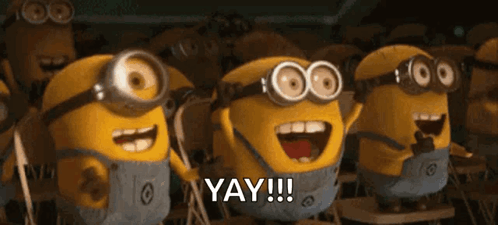